# Algerian Forest Fires

https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

Example of using regression and decision trees on a relatively simple dataset (from UCI ML repository).  The aim is to predict whether a given set of conditions will lead to a forest fire.

This was the first time I used DTreeViz - which provided a fantastic visual of the decision tree.

In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from dtreeviz.trees import *

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [2]:
dirpath = r'C:\Users\joeba\OneDrive\Documents\ML\algerian forest fire'

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely 'Fire' and '¬Fire'

### Bejaia area data

In [11]:
df = pd.read_excel(dirpath+'/Bejaia Region Dataset.xlsx')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [12]:
dict = {'not fire': 0, 'fire': 1}
df = df.replace({'Classes': dict})

df = df.drop(['day', 'month', 'year'], axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [13]:
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

X = df[features]
y = df[['Classes']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1223)

In [15]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(85, 10) (85, 1) (37, 10) (37, 1)


In [16]:
dt = tree.DecisionTreeClassifier().fit(X_train,y_train)

In [20]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
65,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1
69,35,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0.9
21,31,67,17,0.1,79.1,7.0,39.5,2.4,9.7,2.3
56,36,48,13,0.0,90.3,22.2,108.5,8.7,29.4,15.3
...,...,...,...,...,...,...,...,...,...,...
17,31,78,14,0.3,56.9,1.9,8.0,0.7,2.4,0.2
120,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1
116,26,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9


In [21]:
y_train

,Classes
65,1
69,1
97,0
21,0
56,1
...,...
17,0
120,0
116,0
119,0


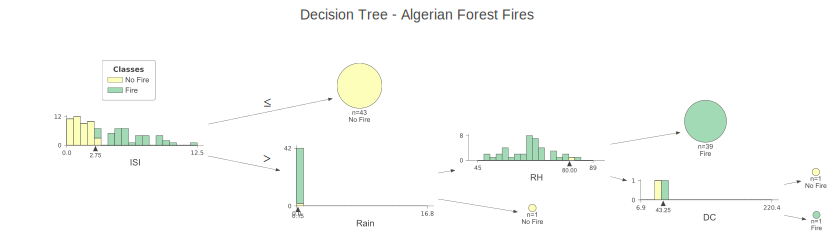

<Figure size 864x1440 with 0 Axes>

In [39]:
# use the DTreeViz package for viewing the tree
# https://towardsdatascience.com/beautiful-decision-tree-visualizations-with-dtreeviz-af1a66c1c180

fig = plt.figure(figsize=(12,20))

viz = dtreeviz(dt, 
               x_data=X_train[features],
               y_data=y_train['Classes'],
               target_name='Classes',
               feature_names=features, 
               class_names=list(['No Fire', 'Fire']), 
               title="Decision Tree - Algerian Forest Fires",
               #scale=2,
               orientation='LR'
              )

viz

OLS Linear Regression

In [30]:
reg = LinearRegression().fit(X_train, y_train)

In [31]:
reg.score(X_train, y_train)

0.8003285752889746

In [32]:
reg.score(X_test, y_test)

0.6880568367816445

In [33]:
print(reg.coef_, reg.intercept_)

[[-0.03969824  0.0125045  -0.02699093  0.01108791  0.00954284 -0.00798515
  -0.00291984  0.24575444  0.02600217 -0.06057348]] [-0.14767997]


In [34]:
pred = pd.DataFrame(reg.predict(X_test))
pred.columns = ['pred']

y_test.reset_index(drop=True, inplace=True)
rslt = y_test.copy()

rslt['pred'] = pred
rslt

,Classes,pred
0,1,1.025009
1,0,0.230445
2,1,1.176517
3,1,0.324395
4,0,-0.096702
5,0,-0.116784
6,1,0.674850
7,0,0.090780
8,0,0.019449
9,0,-0.123478


<AxesSubplot:>

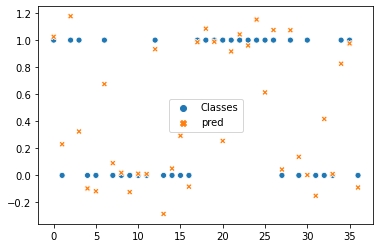

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(data=rslt)

### Siddi-Bel Abbes area data

In [ ]:
df2 = pd.read_excel(dirpath+'/Sidi-Bel Abbes Region Dataset.xlsx')
df2.head()

In [ ]:
df2.drop(['day', 'month', 'year', 'Classes'], axis=1, inplace=True)
X = df2[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
y = df2[['FWI']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# does the SAME model work for Siddi-Bel Abbes???
reg.score(X_test, y_test)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

In [ ]:
pred = pd.DataFrame(reg.predict(X_test))
pred.columns = ['pred']

y_test.reset_index(drop=True, inplace=True)
rslt = y_test.copy()

rslt['pred'] = pred

sns.scatterplot(data=rslt)

In [ ]:
mean_squared_error(y_test, pred, squared=False)

Ridge regression - L2 penalties

In [ ]:
from sklearn.linear_model import Ridge

rdg = Ridge().fit(X_train, y_train)
rdg.score(X_test, y_test)

Lasso regression - L1 penalties

In [ ]:
from sklearn.linear_model import Lasso

lso = Lasso().fit(X_train, y_train)
lso.score(X_test, y_test)

In [ ]:
pred = pd.DataFrame(lso.predict(X_test))
pred.columns = ['pred']

y_test.reset_index(drop=True, inplace=True)
rslt = y_test.copy()

rslt['pred'] = pred

sns.scatterplot(data=rslt)

In [ ]:
mean_squared_error(y_test, pred, squared=False)